In [2]:
# -----------------------------
# Step 1: Import Libraries
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

In [3]:
# -----------------------------
# Step 2: Load Dataset
# -----------------------------
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# -----------------------------
# Step 3: Select Features (for 2D visualization)
# -----------------------------
# We'll use only two features for visualization: Sepal length and Petal length
X = df[['sepal length (cm)', 'petal length (cm)']].values
y = df['target'].values

# Scale features for better performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# -----------------------------
# Step 4: Train Perceptron
# -----------------------------
p = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
p.fit(X, y)

print("Training complete!")
print("Coefficients:", p.coef_)
print("Intercept:", p.intercept_)

Training complete!
Coefficients: [[ 0.10501215 -2.60542765]
 [-0.36350361  2.72819649]
 [-1.31265193  8.06523088]]
Intercept: [-2.  0. -5.]


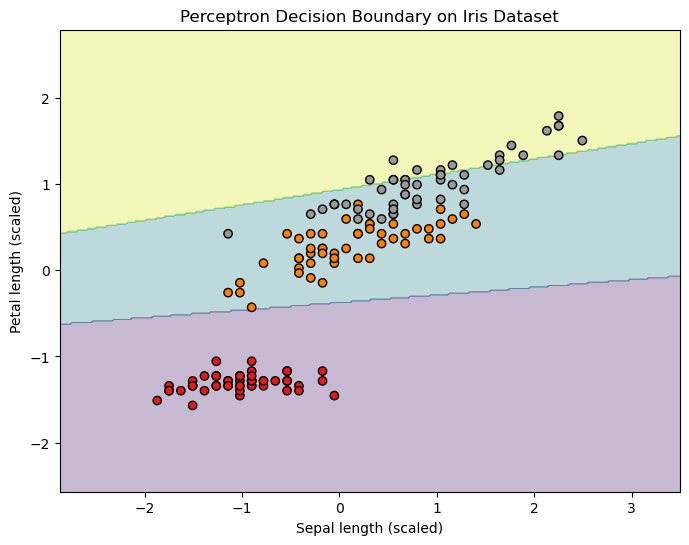

In [6]:
# -----------------------------
# Step 5: Decision Boundary
# -----------------------------
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Petal length (scaled)")
plt.title("Perceptron Decision Boundary on Iris Dataset")
plt.show()

In [7]:
# Accuracy (how many predictions were correct on the training data)
from sklearn.metrics import accuracy_score

y_pred = p.predict(X)
print("Training accuracy:", accuracy_score(y, y_pred))


Training accuracy: 0.78


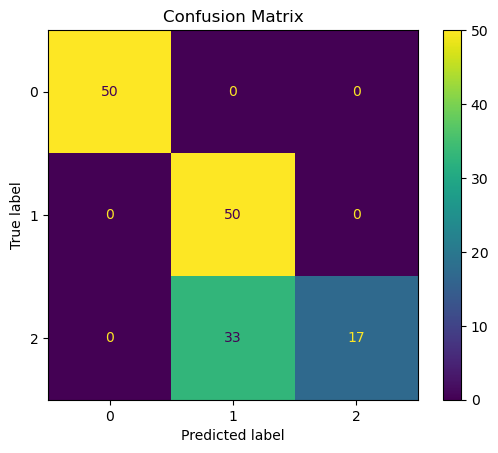

In [8]:
# Confusion matrix (how predictions are right/wrong per class)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()